# library imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from google.colab import drive
drive.mount('/content/gd')

Drive already mounted at /content/gd; to attempt to forcibly remount, call drive.mount("/content/gd", force_remount=True).


# data read

In [ ]:
df=pd.read_csv('gd/My Drive/SARS-2/data/corona_tested_individuals_ver_0083.english.csv',low_memory=False)

# view raw data

In [ ]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


# data preprocessing

In [ ]:
df.shape

(2742596, 10)

In [ ]:
df=df.drop(['test_date'],axis=1)

### checking whether any value of dataset is null or not

In [ ]:
df.isna().sum()

cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

### remove all null values

In [ ]:
df=df.dropna()

### replacing value with binary digit

In [ ]:
df['gender'].replace({'male':0, 'female':1}, inplace=True)
df.gender=df.gender.fillna(2)
print(df)

         cough  fever  ...  gender         test_indication
0            0      0  ...       0                   Other
1            0      1  ...       0                   Other
2            0      0  ...       1                   Other
3            0      0  ...       0                   Other
4            0      1  ...       0  Contact with confirmed
...        ...    ...  ...     ...                     ...
2731639      1      1  ...       1  Contact with confirmed
2731640      0      0  ...       1                   Other
2731643      1      0  ...       0  Contact with confirmed
2731644      0      0  ...       1                   Other
2731647      0      0  ...       1                   Other

[2186227 rows x 9 columns]


In [ ]:
df['age_60_and_above'].replace({'No':0, 'Yes':1}, inplace=True)
df.age_60_and_above=df.age_60_and_above.fillna(2)
print(df)

         cough  fever  ...  gender         test_indication
0            0      0  ...       0                   Other
1            0      1  ...       0                   Other
2            0      0  ...       1                   Other
3            0      0  ...       0                   Other
4            0      1  ...       0  Contact with confirmed
...        ...    ...  ...     ...                     ...
2731639      1      1  ...       1  Contact with confirmed
2731640      0      0  ...       1                   Other
2731643      1      0  ...       0  Contact with confirmed
2731644      0      0  ...       1                   Other
2731647      0      0  ...       1                   Other

[2186227 rows x 9 columns]


In [ ]:
df['test_indication'].replace({'Abroad':0, 'Contact with confirmed':1, 'Other':2}, inplace=True)
print(df)

         cough  fever  sore_throat  ...  age_60_and_above  gender test_indication
0            0      0            0  ...                 0       0               2
1            0      1            0  ...                 0       0               2
2            0      0            0  ...                 1       1               2
3            0      0            0  ...                 0       0               2
4            0      1            0  ...                 0       0               1
...        ...    ...          ...  ...               ...     ...             ...
2731639      1      1            1  ...                 0       1               1
2731640      0      0            0  ...                 0       1               2
2731643      1      0            0  ...                 0       0               1
2731644      0      0            0  ...                 0       1               2
2731647      0      0            0  ...                 0       1               2

[2186227 rows x

In [ ]:
x=df.drop(columns=['corona_result','test_indication'])
y=df['test_indication']

In [ ]:
df.dtypes

cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above        int64
gender                  int64
test_indication         int64
dtype: object

In [ ]:
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,0,0,2
1,0,1,0,0,0,negative,0,0,2
2,0,0,0,0,0,negative,1,1,2
3,0,0,0,0,0,negative,0,0,2
4,0,1,0,0,0,negative,0,0,1
...,...,...,...,...,...,...,...,...,...
2731639,1,1,1,1,1,positive,0,1,1
2731640,0,0,0,0,0,negative,0,1,2
2731643,1,0,0,0,0,negative,0,0,1
2731644,0,0,0,0,0,negative,0,1,2


# describe all data

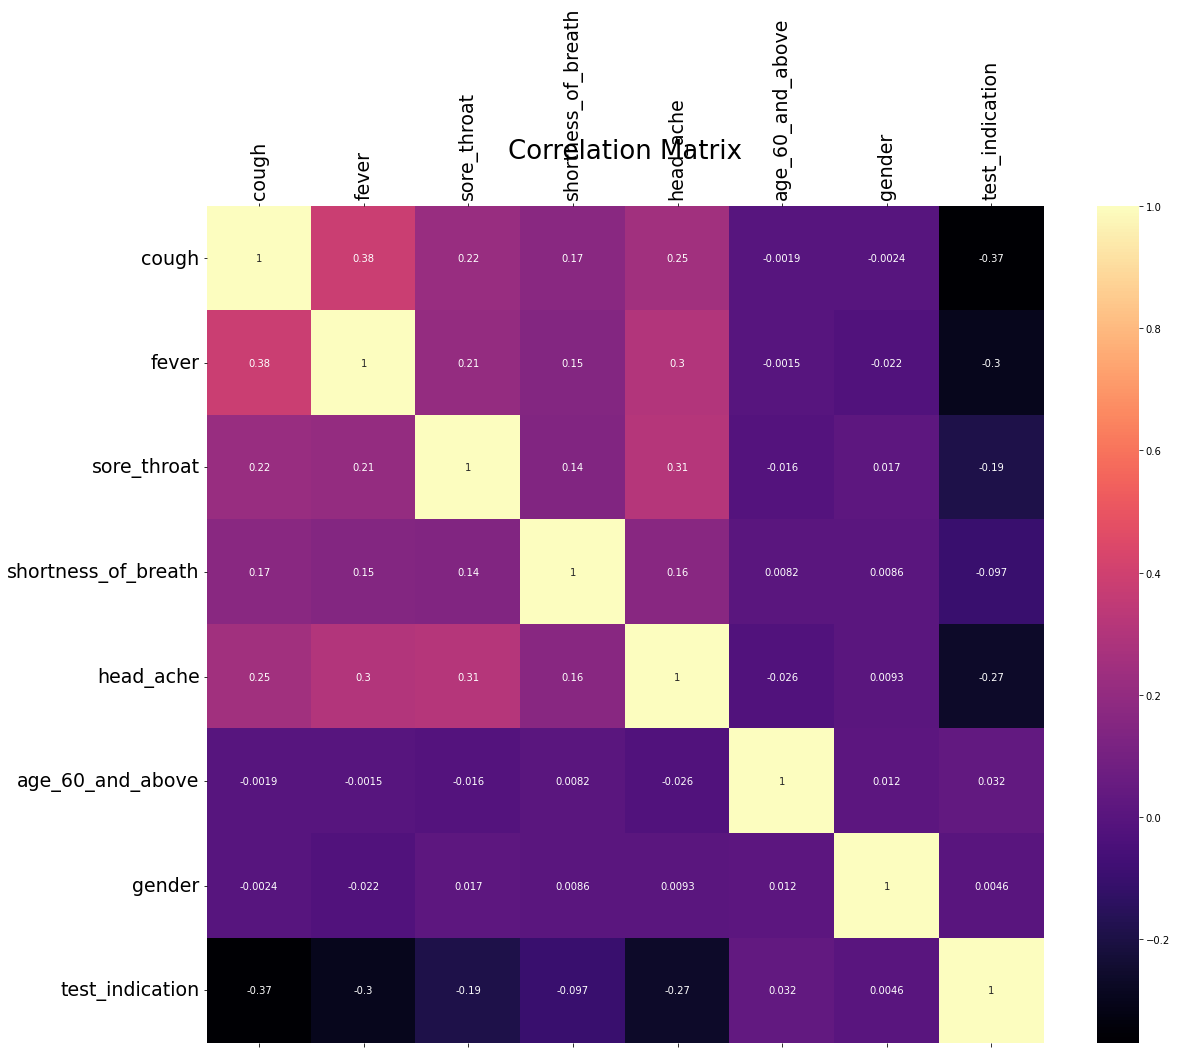

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(),fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=19, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=19)
plt.title('Correlation Matrix', fontsize=26);
dataplot=sns.heatmap(df.corr(),cmap='magma',annot=True)
plt.show()

#  statistics vision

In [ ]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='magma')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


# ready to split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=0)

# Algorithm

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)*100

92.78514459442358

In [ ]:
ypred = model.predict(xtest)
ypred

array([2, 2, 2, ..., 2, 2, 2])

# Confusion Metrics

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

cm=confusion_matrix(ytest,ypred)
print(accuracy_score(ytest,ypred))

0.9278514459442359


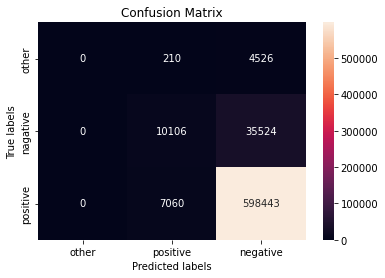

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm,annot=True,fmt='d',ax=ax)

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['other', 'positive','negative']);
ax.yaxis.set_ticklabels(['other', 'nagative','positive']);

In [ ]:
from sklearn.metrics import classification_report

cr=classification_report(ytest,ypred,zero_division=0)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4736
           1       0.58      0.22      0.32     45630
           2       0.94      0.99      0.96    605503

    accuracy                           0.93    655869
   macro avg       0.51      0.40      0.43    655869
weighted avg       0.91      0.93      0.91    655869



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


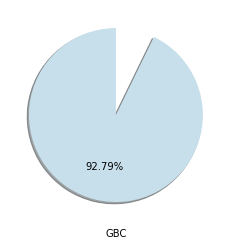

In [ ]:
col=sns.color_palette('ch:s=.25,rot=-.25')
plt.xlabel('GBC')
plt.pie(accuracy_score(ytest,ypred),autopct='%2.2f%%',colors=col,startangle=90,shadow=True)
plt.show()